### Crumbled paper toss
##### You toss 300 pieces of crumbled paper into a bin. You miss the first shot but make the second one. Subsequently, your chance of hitting the bin is equal to the cumulative win-rate. What is the probability of getting 298 hits?

##### The problem can be solved by induction starting with 1 and 2 paper tosses after the first two:
##### For one paper toss, the probability of getting it in (WRR) is $(1+0)/2=1/2$.
##### For two paper toss, the probability of getting both in (WRRR) is: $1/3$
##### Given the alternatives:
##### WRW (1/2) $\to$ WRWR (1/3) or WRWW (2/3)
##### WRR (1/2) $\to$ WRRR (2/3) or WRRW (1/3)
##### Thus, naively, we expect the probability of getting all of 298 tosses in to be: $\mathbb P(298~\text{in})=1/299$

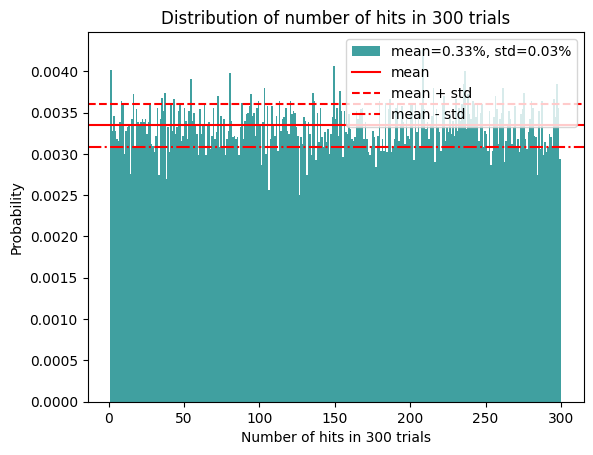

In [24]:
# Let's prove this computationally

import numpy as np
import matplotlib.pyplot as plt

n_sims = 50000
n_trials = 298
prob_0 = 0.5
prob_temp = prob_0
n_total_hits = np.zeros(n_sims)

for i in range(n_sims):
    n_hits_temp = 1
    for j in range(n_trials):
        # Simulate 0 (miss) or 1 (hit) according to probability
        result = np.random.choice([0, 1], p=[1 - prob_temp, prob_temp])
        if result == 1: n_hits_temp += 1
        prob_temp = n_hits_temp / (j + 3)
    n_total_hits[i] = n_hits_temp


hist_values, bin_edges = np.histogram(n_total_hits, bins=range(1, n_trials + 3), density=True)

mean_hist = np.mean(hist_values)
std_hist = np.std(hist_values)

plt.hist(n_total_hits, bins=range(1, n_trials + 3), color='teal', density=True, alpha=0.75, label='mean={:.2f}%, std={:.2f}%'.format(100*mean_hist, 100*std_hist))
plt.axhline(y=mean_hist, color='r', linestyle='-', label='mean')
plt.axhline(y=mean_hist + std_hist, color='r', linestyle='--', label='mean + std')
plt.axhline(y=mean_hist - std_hist, color='r', linestyle='-.', label='mean - std')
plt.legend()
plt.xlabel('Number of hits in 300 trials')
plt.ylabel('Probability')
plt.title('Distribution of number of hits in 300 trials')
plt.show()

##### The distribution looks uniform with probability $\mathbb P(298~\text{in})=1/299\approx 0.33\%$. Let's take uniformity as our null hypothesis and test it.

In [25]:
# let's do a simple KS hypothesis test with null hypothesis that this probability distribution is uniform

from scipy.stats import kstest
min_hits = np.min(n_total_hits)
max_hits = np.max(n_total_hits)
scaled_data = (n_total_hits - min_hits) / (max_hits - min_hits)
ks_statistic, p_value = kstest(scaled_data, 'uniform')

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # significance level: probability of type I error (reject true null hypothesis)
if p_value > alpha:
    print("Fail to reject the null hypothesis: the distribution is uniform.")
else:
    print("Reject the null hypothesis: the distribution is not uniform.")



KS Statistic: 0.005188187919463072
P-value: 0.13501720000996686
Fail to reject the null hypothesis: the distribution is uniform.
